# Kinetic Model Coefficient Analysis

Marc Pérez  
May 22, 2025

In [ ]:
#| include: false
#| message: false
#| warning: false

suppressPackageStartupMessages({
  library(multcomp)
  library(car)
  library(tidyr)
  library(lme4)
  library(ggplot2)
  library(ggtext)
  library(ggpmisc)
  library(nlme)
  library(latex2exp)
  library(kableExtra)
  library(broom)
  library(dplyr)
  library(MuMIn)
})

options(warn = -1)
RES <- readRDS("~/Documents/Master Thesis/Master-Thesis-P-kinetics/data/RES.rds")
D <- RES$D2
d <- RES$data

Model Agroscope $$Y_{rel}\sim A*(1-e^{rate*P_{CO_2}+Env})$$

Wir ersetzen nur rate mit unserer Schätzung k: $$Y_{rel}\sim A*(1-e^{k*P_{CO_2}+Env})$$

Sind unsere Modelparameter gute Prediktoren?? $$Y_{rel}\sim A*(1-e^{k*PS+Env} )$$

Es gibt noch die Kovariaten Niederschlag pro Jahr, Jahresdurchschnittstemperatur und Temperatur in Jugendphase

In [ ]:
#| eval: false
#| include: false

library(GGally)

ggpairs(D, 
  aes(col=Site, shape = Treatment,alpha = 0.6), 
  columns = c("soil_0_20_P_AAE10", "soil_0_20_P_CO2", "PS", "k", "kPS"),
  lower = list(continuous = wrap("points", size = 1.3)),
  upper = list(continuous = "blank", combo = "blank", discrete = "blank"))  # Adjust size here
  




p6 <- ggplot(D,aes(y=soil_0_20_P_AAE10, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) + 
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{H_2O10}(mg/kg Soil)$"),
         y=TeX("$P_{AAEDTA}(mg/kg Soil)$")); p6
  
p7 <- ggplot(D,aes(y=PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
          y=TeX("$PS(mg/kg Soil)$")); p7

p8 <- ggplot(D,aes(y=k, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$")); p8

p9 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_CO2, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
  scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{CO_2}(mg/kg Soil)$"),
         y=TeX("$v=k*PS(mg/s*kg Soil)$"));p9


p11 <- ggplot(D,aes(y=PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$PS(mg/kg Soil)$")); p11

p12 <- ggplot(D,aes(y=k, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  geom_point(shape = 7) +
   scale_x_log10() + scale_y_log10() +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$k(1/s)$"))

p12

p13 <- ggplot(D,aes(y=k*PS, x=soil_0_20_P_AAE10, col=Site, size = Treatment)) +
  scale_x_log10() + scale_y_log10() +
  geom_point(shape = 7) +
  labs(x=TeX("$P_{AAEDTA}(mg/kg Soil)$"),
         y=TeX("$log(v)=log(k*PS)(mg/s*kg Soil)$"))

p13

Nun noch die Linearen Regressionen, die ausstehend sind:

`(1|year) + (1|Site)  + (1|Site:block) + (Treatment|Site)`

Random intercept per year and site, block nested in site. and Treatment nested in site (could also be modelled as a random slope to allow for correlations)

wir sind abe nicht an einem Treatment effekt interesseiert. drum verwerfen wir Treatment als Random UND Fixed effekt.

1.  Vergleiche PS, k und kPS mit


Attaching package: 'lmerTest'

The following object is masked from 'package:lme4':

    lmer

The following object is masked from 'package:stats':

    step

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.06987647 0.9104987

           R2m       R2c
[1,] 0.3680394 0.8251728

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01132987 0.3222732

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01389348 0.3206529

            R2m       R2c
[1,] 0.03949443 0.2327285

boundary (singular) fit: see help('isSingular')

            R2m      R2c
[1,] 0.02354704 0.220675

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.02559532 0.4046309

Linear mixed model fit by REML. t-tests use Kenward-Roger's method [
lmerModLmerTest]
Formula: Ymain_norm ~ k * log(PS) + (1 | year) + (1 | Site) + (1 | Site:block)
   Data: D
 Subset: Treatment == "P0"

REML criterion at convergence: 237

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.2274 -0.2703  0.0472  0.3082  4.2211 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept) 0.00000  0.0000  
 year       (Intercept) 0.09912  0.3148  
 Site       (Intercept) 0.08030  0.2834  
 Residual               0.28181  0.5309  
Number of obs: 140, groups:  Site:block, 20; year, 7; Site, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)
(Intercept)   2.1092     1.8704 13.9709   1.128    0.278
k            -3.5406    10.2424 13.6015  -0.346    0.735
log(PS)       0.2281     0.5500 13.3627   0.415    0.685
k:log(PS)    -0.5902     3.0029 13.2694  -0.197    0.847

Correlation of Fixed Effects:
          (Intr) k      lg(PS)
k      

            R2m       R2c
[1,] 0.03216247 0.2739785

          R2m       R2c
[1,] 0.226324 0.4317041

          R2m       R2c
[1,] 0.202547 0.4445619

           R2m       R2c
[1,] 0.2239347 0.4394869

boundary (singular) fit: see help('isSingular')

            R2m       R2c
[1,] 0.01389348 0.3206529

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

               GVIF Df GVIF^(1/(2*Df))
k         12.721081  1        3.566662
log(PS)   12.182601  1        3.490358
crop       1.044188  5        1.004333
k:log(PS) 29.426189  1        5.424591

there are higher-order terms (interactions) in this model
consider setting type = 'predictor'; see ?vif

                            GVIF Df GVIF^(1/(2*Df))
scale(k)                1.120802  1        1.058679
scale(log(PS))          1.071093  1        1.034936
crop                    1.044188  5        1.004333
scale(k):scale(log(PS)) 1.015027  1        1.007486

            GVIF Df GVIF^(1/(2*Df))
k       1.112232  1        1.054624
log(PS) 1.068219  1        1.033547
crop    1.043502  5        1.004267

                GVIF Df GVIF^(1/(2*Df))
I(k * (PS)) 4.640782  1        2.154247
k           2.041541  1        1.428825
log(PS)     4.690858  1        2.165839
crop        1.045520  5        1.004461

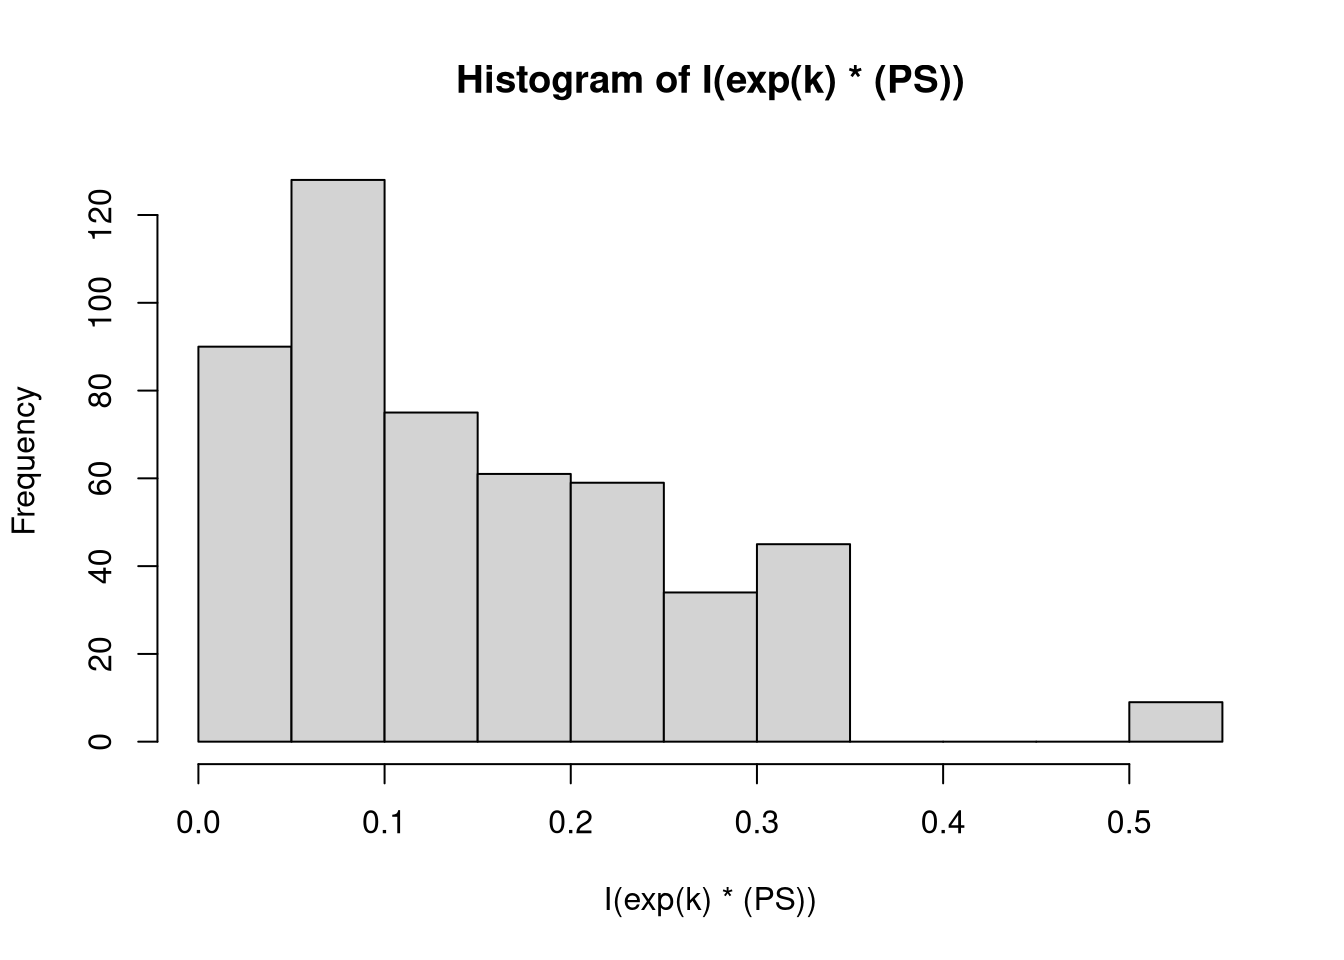

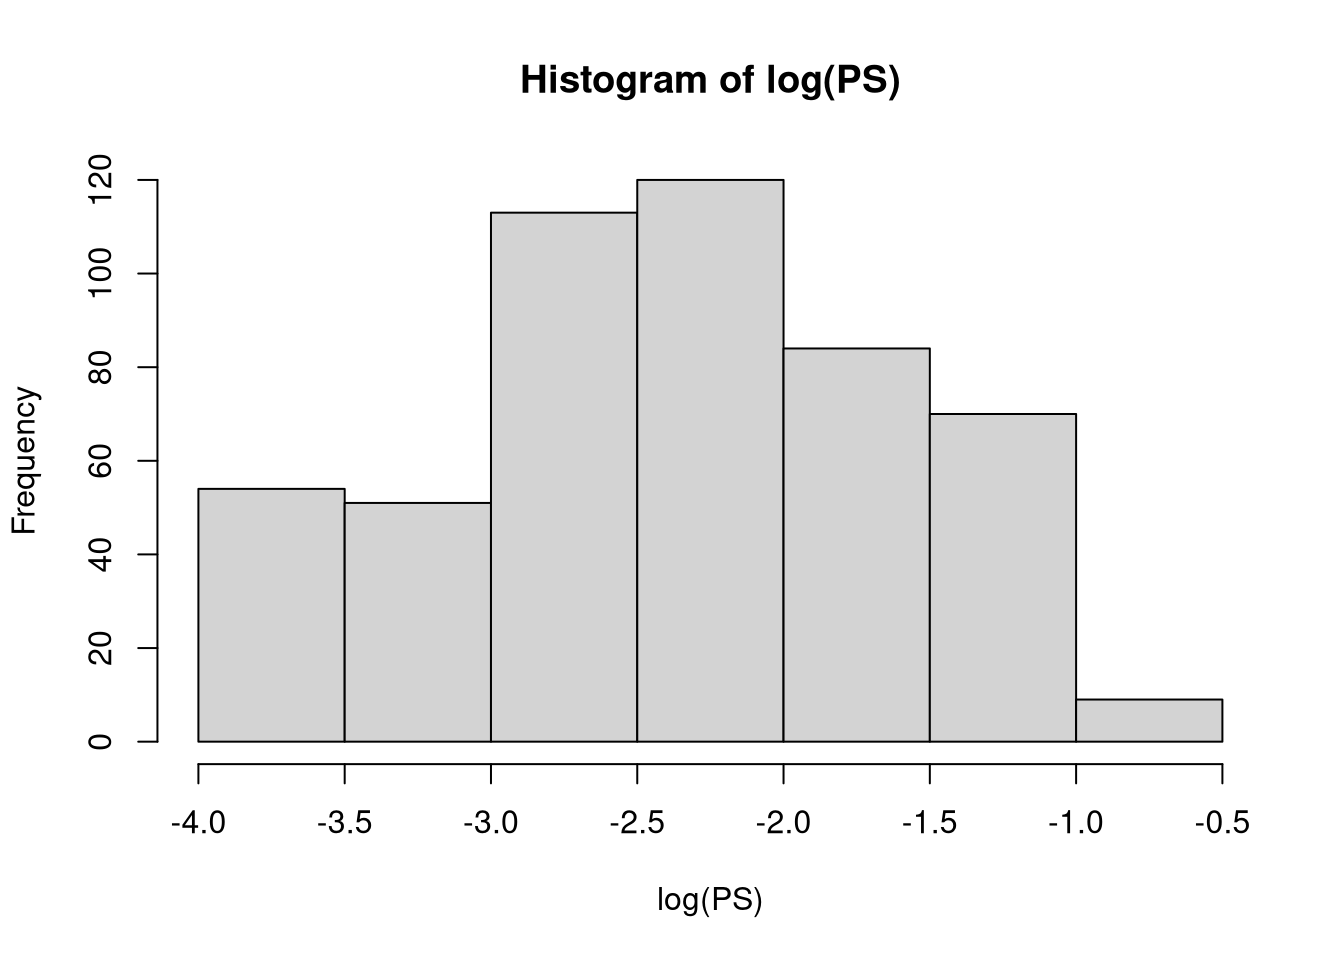

            R2m       R2c
[1,] 0.01389348 0.3206529

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value  Pr(>F)  
soil_0_20_clay   0.002083 0.002083     1 38.033  0.0569 0.81272  
soil_0_20_pH_H2O 0.000134 0.000134     1 37.384  0.0037 0.95203  
soil_0_20_Corg   0.161222 0.161222     1 31.905  4.4045 0.04385 *
soil_0_20_silt   0.004846 0.004846     1 38.673  0.1324 0.71793  
Feox             0.001149 0.001149     1  0.347  0.0314 0.91632  
Alox             0.012358 0.012358     1  0.257  0.3376 0.79220  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = log(PS) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Feox + Alox + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)
(Intercept) == 0      -4.315984   2.026178  -2.130    0.177
soil_0_20_clay == 0   -0.007322   0.030690  -0.239    1.000
soil_0_20_pH_H2O == 0 -0.007820   0.129130  -0.061    1.000
soil_0_20_Corg == 0    0.635270   0.302698   2.099    0.189
soil_0_20_silt == 0   -0.010244   0.028153  -0.364    0.999
Feox == 0             -0.052865   0.298418  -0.177    1.000
Alox == 0              0.603465   1.038573   0.581    0.989
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                    Sum Sq   Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.0118462 0.0118462     1 39.973 10.7210 0.002191 **
soil_0_20_pH_H2O 0.0011812 0.0011812     1 38.291  1.0690 0.307665   
soil_0_20_Corg   0.0090425 0.0090425     1 35.487  8.1836 0.007040 **
soil_0_20_silt   0.0012705 0.0012705     1 10.804  1.1498 0.306956   
Feox             0.0000004 0.0000004     1  0.968  0.0003 0.988186   
Alox             0.0004765 0.0004765     1  1.117  0.4312 0.620552   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = k ~ soil_0_20_clay + soil_0_20_pH_H2O + soil_0_20_Corg + 
    soil_0_20_silt + Feox + Alox + (1 | year) + (1 | Site) + 
    (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                       Estimate Std. Error z value Pr(>|z|)   
(Intercept) == 0       0.608404   0.351212   1.732  0.37906   
soil_0_20_clay == 0   -0.016659   0.005088  -3.274  0.00689 **
soil_0_20_pH_H2O == 0 -0.022256   0.021526  -1.034  0.84731   
soil_0_20_Corg == 0    0.137353   0.048014   2.861  0.02627 * 
soil_0_20_silt == 0    0.004094   0.003818   1.072  0.82616   
Feox == 0              0.001024   0.054815   0.019  1.00000   
Alox == 0             -0.128860   0.196235  -0.657  0.97805   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
                  Sum Sq Mean Sq NumDF  DenDF F value   Pr(>F)   
soil_0_20_clay   0.27383 0.27383     1 37.930  3.2642 0.078745 . 
soil_0_20_pH_H2O 0.00989 0.00989     1 37.703  0.1179 0.733211   
soil_0_20_Corg   0.63137 0.63137     1 32.625  7.5263 0.009799 **
soil_0_20_silt   0.00591 0.00591     1 39.206  0.0705 0.791988   
Feox             0.04311 0.04311     1  0.225  0.5139 0.775407   
Alox             0.00881 0.00881     1  0.130  0.1050 0.904677   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


     Simultaneous Tests for General Linear Hypotheses

Fit: lmer(formula = I(log(k * PS)) ~ soil_0_20_clay + soil_0_20_pH_H2O + 
    soil_0_20_Corg + soil_0_20_silt + Feox + Alox + (1 | year) + 
    (1 | Site) + (1 | Site:block) + (1 | Site:Treatment), data = D)

Linear Hypotheses:
                      Estimate Std. Error z value Pr(>|z|)  
(Intercept) == 0      -5.22214    2.67612  -1.951   0.2520  
soil_0_20_clay == 0   -0.08506    0.04708  -1.807   0.3309  
soil_0_20_pH_H2O == 0 -0.06836    0.19908  -0.343   0.9993  
soil_0_20_Corg == 0    1.29047    0.47039   2.743   0.0366 *
soil_0_20_silt == 0   -0.01141    0.04296  -0.266   0.9998  
Feox == 0              0.24813    0.34612   0.717   0.9669  
Alox == 0              0.36766    1.13436   0.324   0.9995  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value  Pr(>F)  
k         7760.6  7760.6     1 301.92  5.7850 0.01676 *
log(PS)   5373.3  5373.3     1 302.30  4.0054 0.04625 *
k:log(PS) 8701.9  8701.9     1 302.51  6.4866 0.01136 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Type III Analysis of Variance Table with Satterthwaite's method
            Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
k         0.151218 0.151218     1 269.22  0.6379 0.4252
log(PS)   0.019202 0.019202     1 268.74  0.0810 0.7762
k:log(PS) 0.201373 0.201373     1 268.71  0.8494 0.3575

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value Pr(>F)
k         45.672  45.672     1 294.59  0.5847 0.4451
log(PS)   84.870  84.870     1 295.00  1.0866 0.2981
k:log(PS) 50.311  50.311     1 295.03  0.6441 0.4229

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
soil_0_20_clay   0.017260 0.017260     1 38.410  0.1191 0.7319
soil_0_20_pH_H2O 0.080631 0.080631     1 38.254  0.5562 0.4604
soil_0_20_Corg   0.029198 0.029198     1 38.466  0.2014 0.6561
soil_0_20_silt   0.005041 0.005041     1 40.886  0.0348 0.8530
Feox             0.102556 0.102556     1 14.728  0.7074 0.4138
Alox             0.001448 0.001448     1  4.877  0.0100 0.9244

Type III Analysis of Variance Table with Satterthwaite's method
                   Sum Sq  Mean Sq NumDF  DenDF F value Pr(>F)
soil_0_20_clay   0.000000 0.000000     1 34.138  0.0000 0.9993
soil_0_20_pH_H2O 0.022655 0.022655     1 30.975  0.3822 0.5409
soil_0_20_Corg   0.091344 0.091344     1 27.873  1.5412 0.2248
soil_0_20_silt   0.033276 0.033276     1 34.322  0.5614 0.4588
Feox             0.023984 0.023984     1  7.835  0.4047 0.5428
Alox             0.104053 0.104053     1  3.886  1.7556 0.2577

Type III Analysis of Variance Table with Satterthwaite's method
          Sum Sq Mean Sq NumDF  DenDF F value    Pr(>F)    
k          124.7   124.7     1 275.62  0.6004    0.4391    
log(PS)   4906.5  4906.5     1 285.15 23.6264 1.935e-06 ***
k:log(PS)  120.8   120.8     1 280.10  0.5819    0.4462    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ k * log(PS) + (1 | year) + (1 | Site) + (1 |  
    Site:block)
   Data: D

REML criterion at convergence: 2719.8

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3960 -0.5775  0.0036  0.5915  2.8874 

Random effects:
 Groups     Name        Variance Std.Dev.
 Site:block (Intercept)  27.20    5.216  
 year       (Intercept)  54.22    7.363  
 Site       (Intercept) 127.50   11.292  
 Residual               207.67   14.411  
Number of obs: 330, groups:  Site:block, 20; year, 7; Site, 5

Fixed effects:
            Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)   59.223     11.538  62.390   5.133 3.02e-06 ***
k             42.436     54.765 275.615   0.775    0.439    
log(PS)       21.577      4.439 285.149   4.861 1.93e-06 ***
k:log(PS)     17.933     23.508 280.101   0.763    0.446    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 

           R2m       R2c
[1,] 0.4896394 0.7455866

            R2m       R2c
[1,] 0.04012948 0.7758557

            R2m       R2c
[1,] 0.01503741 0.5119295

            R2m       R2c
[1,] 0.01389348 0.3206529

In [ ]:
#|code-fold: true
#|tidy: true


# Wovon hängen Modelparameter ab?

library(lmerTest)

Since we now model two measurement methods, we do not expect correlations by Site/year/etc

In [ ]:
#|code-fold: true
#|tidy: true
# fit.PS       <- lm(PS            ~ soil_0_20_P_CO2 + soil_0_20_P_AAE10, D)
fit.grud.PS       <- lm(log(PS)         ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.k        <- lm(k               ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)
fit.grud.kPS      <- lm(I(log(k*PS))    ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), D)

fit.grud.CO2.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)
fit.grud.AAE10.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_AAE10) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)
fit.grud.Yrel     <- lmer(Ymain_rel       ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)


# this is hopeless, since cannot log becaus of 0's
fit.CO2.Pexport     <- lmer(annual_P_uptake     ~ log(soil_0_20_P_CO2) + (1|year) + (1|Site)  + (1|Site:block) + (1|Site:Treatment), D)

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')

boundary (singular) fit: see help('isSingular')


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = log(PS) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -1.62462    0.23590  -6.887   <1e-05 ***
log(soil_0_20_P_CO2) == 0    1.03597    0.06088  17.017   <1e-05 ***
log(soil_0_20_P_AAE10) == 0 -0.01187    0.06067  -0.196    0.966    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = k ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0             0.101007   0.029593   3.413  0.00120 ** 
log(soil_0_20_P_CO2) == 0   -0.027290   0.007637  -3.573  < 0.001 ***
log(soil_0_20_P_AAE10) == 0  0.021789   0.007612   2.863  0.00765 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)


     Simultaneous Tests for General Linear Hypotheses

Fit: lm(formula = I(log(k * PS)) ~ log(soil_0_20_P_CO2) + log(soil_0_20_P_AAE10), 
    data = D)

Linear Hypotheses:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept) == 0            -3.67498    0.24189 -15.193   <1e-04 ***
log(soil_0_20_P_CO2) == 0    0.91106    0.06243  14.594   <1e-04 ***
log(soil_0_20_P_AAE10) == 0  0.06769    0.06222   1.088    0.391    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
(Adjusted p values reported -- single-step method)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: Ymain_rel ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) + (1 |  
    year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1731.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.0471 -0.6233 -0.0496  0.5860  3.1830 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)   4.449   2.109  
 Site:Treatment (Intercept)  29.254   5.409  
 year           (Intercept) 169.205  13.008  
 Site           (Intercept)  15.292   3.911  
 Residual                   191.096  13.824  
Number of obs: 212, groups:  
Site:block, 16; Site:Treatment, 12; year, 5; Site, 4

Fixed effects:
                                            Estimate Std. Error      df t value
(Intercept)                                   86.797     20.421  86.613   4.250
log(soil_0_20_P_CO2)                          17.430     11.945 164.2

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_uptake ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 1834.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.2817 -0.4518 -0.0801  0.4504  4.7520 

Random effects:
 Groups         Name        Variance Std.Dev.
 Site:block     (Intercept)  0.00    0.000   
 Site:Treatment (Intercept)  0.00    0.000   
 year           (Intercept) 75.76    8.704   
 Site           (Intercept) 30.12    5.489   
 Residual                   64.95    8.059   
Number of obs: 259, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                                            Estimate Std. Error       df
(Intercept)                                  30.6288    11.3421 133.4332
log(soil_0_20_P_CO2)                          9.8213     5.8400 250.2829
log(

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: annual_P_balance ~ log(soil_0_20_P_CO2) * log(soil_0_20_P_AAE10) +  
    (1 | year) + (1 | Site) + (1 | Site:block) + (1 | Site:Treatment)
   Data: D

REML criterion at convergence: 2121.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.3603 -0.5255  0.0342  0.5431  2.8598 

Random effects:
 Groups         Name        Variance  Std.Dev. 
 Site:block     (Intercept) 0.000e+00  0.000000
 Site:Treatment (Intercept) 5.170e+02 22.737367
 year           (Intercept) 6.267e+01  7.916138
 Site           (Intercept) 1.570e-06  0.001253
 Residual                   1.118e+02 10.571431
Number of obs: 274, groups:  
Site:block, 16; Site:Treatment, 12; year, 6; Site, 4

Fixed effects:
                                            Estimate Std. Error      df t value
(Intercept)                                   -5.502     15.689 163.186  -0.351
log(soil_0_20_P_CO2)                         -10.4

            R2m       R2c
[1,] 0.01324864 0.8405073

            R2m       R2c
[1,] 0.07722235 0.6491677

            R2m       R2c
[1,] 0.09927847 0.5794631

In [ ]:
create_coef_table <- function(lmer_models, 
                              covariate_order = NULL, 
                              covariate_labels = NULL, # NEU: Benannter Vektor für Zeilennamen
                              model_labels = NULL) {   # NEU: Benannter Vektor für Spaltennamen

  # Extract coefficients and p-values (Ihre Originalfunktion, keine Änderung hier)
  extract_coef_info <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    coef_matrix <- summary(model)|> coef()
    estimates <- coef_matrix[, 1]
    p_values <- coef_matrix[, ncol(coef_matrix)]
    formatted_coef <- sapply(seq_along(estimates), function(i) {
      est_str <- sprintf("%.3f", estimates[i])
      stars <- if (p_values[i] < 0.001) "***" else
               if (p_values[i] < 0.01) "** " else
               if (p_values[i] < 0.05) "* " else  ""
      paste0(stars, est_str)
    })
    names(formatted_coef) <- rownames(coef_matrix)
    return(formatted_coef)
  }

  # Extract R-squared values (Ihre Originalfunktion, keine Änderung hier)
  extract_r_squared <- function(model) {
    # ... (keine Änderung, Ihr Code bleibt hier)
    r2_values <- MuMIn::r.squaredGLMM(model) # MuMIn:: hinzugefügt für Klarheit
    return(c(
      R2m = sprintf("%.3f", r2_values[1, "R2m"]),
      R2c = sprintf("%.3f", r2_values[1, "R2c"])
    ))
  }

  # Daten extrahieren (Ihr Originalcode)
  all_coefs <- lapply(lmer_models, extract_coef_info)
  all_r_squared <- lapply(lmer_models, extract_r_squared)
  all_covariate_names <- unique(unlist(lapply(all_coefs, names)))

  if (is.null(covariate_order)) {
    covariate_order <- c("(Intercept)", sort(all_covariate_names[all_covariate_names != "(Intercept)"]))
  }
  covariate_order <- covariate_order[covariate_order %in% all_covariate_names]
  final_order <- c(covariate_order, "R2m", "R2c")

  # Matrix erstellen (Ihr Originalcode)
  results_matrix <- matrix("",
                           nrow = length(final_order),
                           ncol = length(lmer_models),
                           dimnames = list(final_order, names(lmer_models)))

  # Matrix füllen (Ihr Originalcode)
  for (model_name in names(lmer_models)) {
    model_coefs <- all_coefs[[model_name]]
    for (covar in names(model_coefs)) {
      if (covar %in% covariate_order) {
        results_matrix[covar, model_name] <- model_coefs[covar]
      }
    }
    r2_values <- all_r_squared[[model_name]]
    results_matrix["R2m", model_name] <- r2_values["R2m"]
    results_matrix["R2c", model_name] <- r2_values["R2c"]
  }

  # --- NEU: Zeilen- und Spaltennamen ersetzen ---
  
  # Ersetze die Zeilennamen (Kovariaten), falls covariate_labels übergeben wurde
  if (!is.null(covariate_labels)) {
    # Finde die Übereinstimmungen in den aktuellen Zeilennamen
    row_matches <- match(rownames(results_matrix), names(covariate_labels))
    # Ersetze nur die, die gefunden wurden
    new_rownames <- rownames(results_matrix)
    new_rownames[!is.na(row_matches)] <- covariate_labels[row_matches[!is.na(row_matches)]]
    rownames(results_matrix) <- new_rownames
  }
  
  # Ersetze die Spaltennamen (Modelle), falls model_labels übergeben wurde
  if (!is.null(model_labels)) {
    col_matches <- match(colnames(results_matrix), names(model_labels))
    new_colnames <- colnames(results_matrix)
    new_colnames[!is.na(col_matches)] <- model_labels[col_matches[!is.na(col_matches)]]
    colnames(results_matrix) <- new_colnames
  }
  
  # --- Ende der neuen Sektion ---

  # Convert to data frame for kable
  results_df <- data.frame("Response" = rownames(results_matrix),
                           results_matrix,
                           check.names = FALSE, # Verhindert, dass R Spaltennamen ändert
                           stringsAsFactors = FALSE)
  
  results_df
}

  Response                   PS             k   log(k\*PS)      CO2    AAE10
  ------------------ ---------- ------------- ------------ -------- --------
  (Intercept)            -4.316         0.608       -5.222   -2.467    2.482
  Alox                    0.603        -0.129        0.368   -0.071   -0.940
  Feox                   -0.053         0.001        0.248   -0.223   -0.146
  soil_0_20_clay         -0.007   \*\* -0.017       -0.085    0.017    0.000
  soil_0_20_Corg       \* 0.635    \*\* 0.137   \*\* 1.290    0.203    0.399
  soil_0_20_pH_H2O       -0.008        -0.022       -0.068    0.154    0.092
  soil_0_20_silt         -0.010         0.004       -0.011    0.008    0.023
  R2m                     0.100         0.204        0.070    0.103    0.285
  R2c                     0.954         0.963        0.910    0.664    0.881

  : Coefficient Table for Soil covariates. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05


  ----------------------------------------------------------------------------------------------------------------------------------------------------------------
  Response                                         Yn-STP-CO2   Yn-STP-AAE10   Yn-STP-GRUD   Yn-Kinetic      Yr-STP-CO2   Yr-STP-AAE10    Yr-STP-GRUD   Yr-Kinetic
  --------------------------------------------- ------------- -------------- ------------- ------------ --------------- -------------- -------------- ------------
  (Intercept)                                     \*\*\*1.038    \*\*\*0.463   \*\*\*0.970     \* 0.993   \*\*\*104.177   \*\*\*65.643   \*\*\*86.797  \*\* 82.385

  k                                                                                               1.913                                                 \* 294.257

  k:log(PS)                                                                                       0.805                                                 \* 131.381

  log(PS)                                                                                        -0.047                                                 \* -18.957

  log(soil_0_20_P_AAE10)                                         \*\*\*0.140         0.020                                 \*\*\*9.963          4.593 

  log(soil_0_20_P_CO2)                            \*\*\*0.163                        0.095                  \*\*\*8.623                        17.430 

  log(soil_0_20_P_CO2):log(soil_0_20_P_AAE10)                                        0.021                                                     -4.372 

  R2m                                                   0.226          0.203         0.224        0.014           0.066          0.092          0.099        0.015

  R2c                                                   0.432          0.445         0.439        0.321           0.573          0.576          0.579        0.512
  ----------------------------------------------------------------------------------------------------------------------------------------------------------------

  : Coefficient Table for Ynorm and Yrel. Significant codes: 0 '\*\*\*'
  0.001 '\*\*' 0.01 '\*' 0.05


`geom_smooth()` using formula = 'y ~ x'

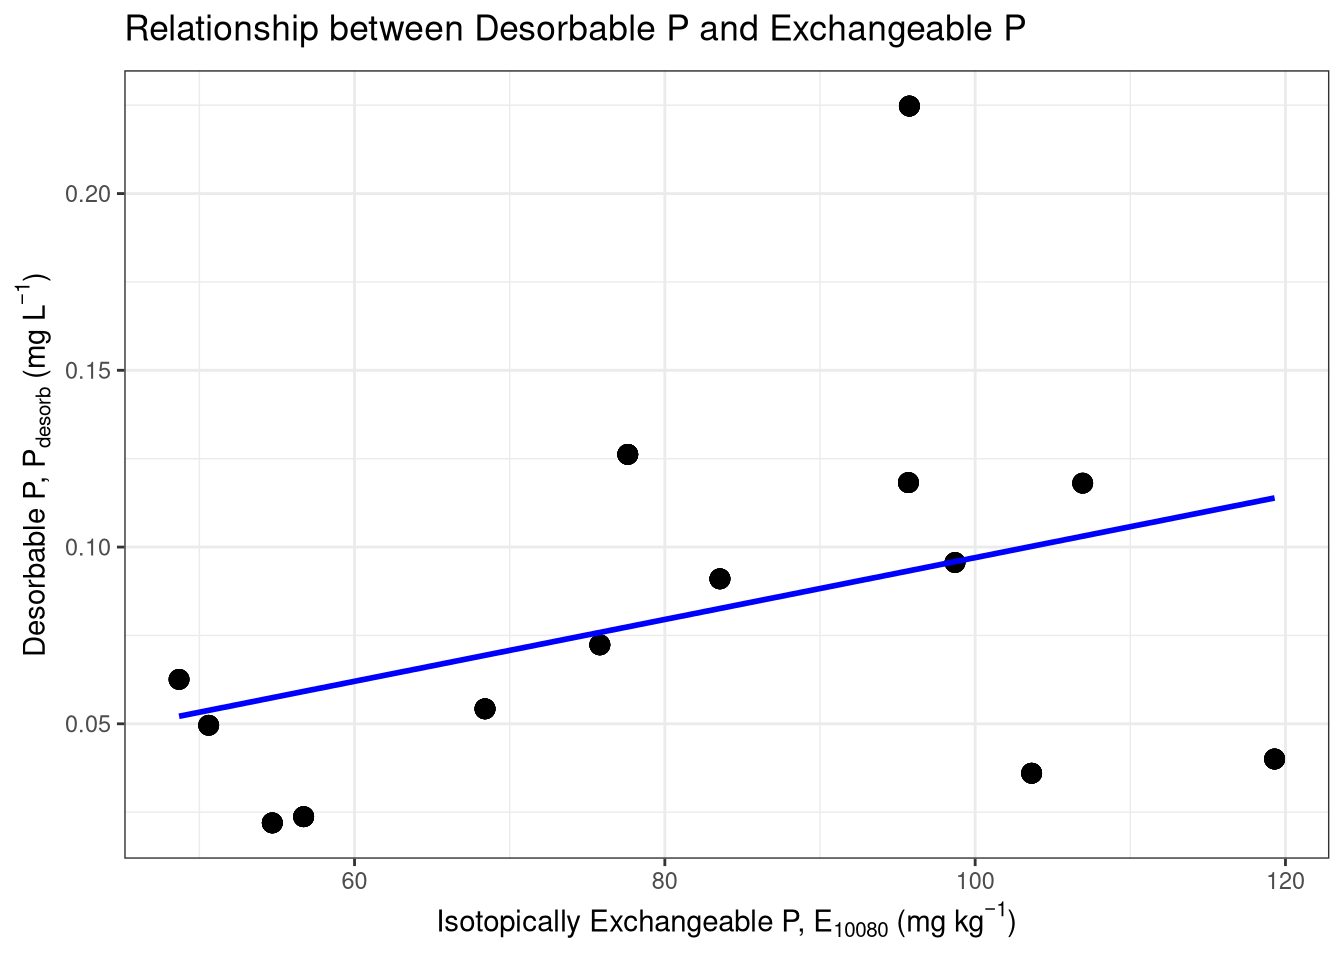

[1] "Spearman correlation between PS and E_exp_10080:"


    Spearman's rank correlation rho

data:  correlation_data$PS and correlation_data$E_exp_10080
S = 145564, p-value = 5.745e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4104453 

`geom_smooth()` using formula = 'y ~ x'

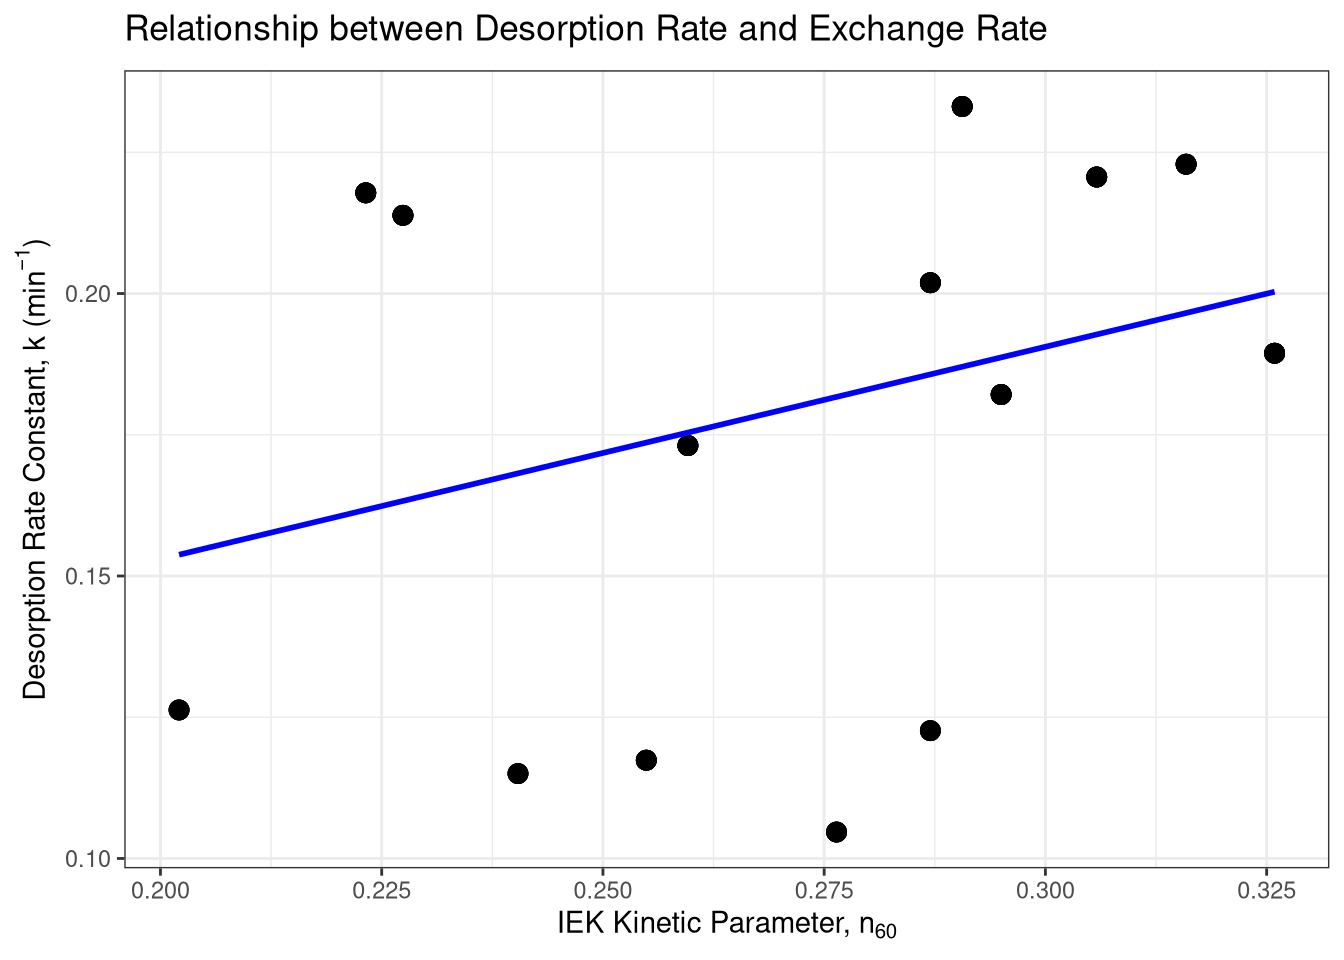

[1] "Spearman correlation between k and n_60:"


    Spearman's rank correlation rho

data:  correlation_data$k and correlation_data$n_1440
S = 155343, p-value = 4.873e-05
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.3708392 

[1] Cadenazzo   Ellighausen Oensingen   Reckenholz  Ruemlang   
Levels: Cadenazzo Ellighausen Oensingen Reckenholz Ruemlang

In [ ]:
lmer_models <- list(
  PS = fit.soil.PS,
  k = fit.soil.k,
  'log(k*PS)' = fit.soil.kPS,
  CO2 = fit.soil.CO2,
  AAE10 = fit.soil.AAE10
)



coef_table_soil <- create_coef_table(lmer_models)
kable(coef_table_soil,
row.names = FALSE,
align = c("l", rep("r", ncol(coef_table_soil) - 1)),
escape = FALSE,
caption = "Coefficient Table for Soil covariates. 
Significant codes:  0 '\\*\\*\\*' 0.001 '\\*\\*' 0.01 '\\*' 0.05")